In [46]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Data load
train_data = pd.read_csv("carseats_train.csv")
test_data = pd.read_csv("carseats_test.csv")

# Print data shape
print("Train Data:")
print(train_data.head())
print(train_data.shape)
print("\nTest Data:")
print(test_data.head())
print(test_data.shape)

Train Data:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   5.68        113      22            1         317    132    Medium   28   
1  12.29        147      74           13         251    131      Good   52   
2   8.32        122     102           19         469    123       Bad   29   
3  11.48        121     120           13         140     87    Medium   56   
4   5.68        130      64            0          40    106       Bad   39   

   Education Urban   US  
0         12   Yes   No  
1         10   Yes  Yes  
2         13   Yes  Yes  
3         11   Yes  Yes  
4         17    No   No  
(320, 11)

Test Data:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   4.15        141      64            3         340    128       Bad   38   
1   8.87        131     113            0         181    120      Good   63   
2   3.98        122      35            2         393    136    Medium   62   
3   6.41        142      30  

In [48]:
# Binary encoding
# Convert 'No' to 0 and 'Yes' to 1 in the 'Urban' and 'US' columns
train_data['Urban'] = train_data['Urban'].map({'No': 0, 'Yes': 1})
train_data['US'] = train_data['US'].map({'No': 0, 'Yes': 1})
test_data['Urban'] = test_data['Urban'].map({'No': 0, 'Yes': 1})
test_data['US'] = test_data['US'].map({'No': 0, 'Yes': 1})

# Print data afterwards
print("Train Data after conversion:")
print(train_data.head())
print("\nTest Data after conversion:")
print(test_data.head())

Train Data after conversion:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   5.68        113      22            1         317    132    Medium   28   
1  12.29        147      74           13         251    131      Good   52   
2   8.32        122     102           19         469    123       Bad   29   
3  11.48        121     120           13         140     87    Medium   56   
4   5.68        130      64            0          40    106       Bad   39   

   Education  Urban  US  
0         12      1   0  
1         10      1   1  
2         13      1   1  
3         11      1   1  
4         17      0   0  

Test Data after conversion:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   4.15        141      64            3         340    128       Bad   38   
1   8.87        131     113            0         181    120      Good   63   
2   3.98        122      35            2         393    136    Medium   62   
3   6

In [49]:
# One-hot encoding for 'ShelveLoc'
train_data = pd.get_dummies(train_data, columns=['ShelveLoc'], prefix='ShelveLoc', drop_first=False).astype(int)
test_data = pd.get_dummies(test_data, columns=['ShelveLoc'], prefix='ShelveLoc', drop_first=False).astype(int)

# Print data
print("\nTrain Data after encoding:")
print(train_data.head())
print("\nTest Data after encoding:")
print(test_data.head())


Train Data after encoding:
   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0      5        113      22            1         317    132   28         12   
1     12        147      74           13         251    131   52         10   
2      8        122     102           19         469    123   29         13   
3     11        121     120           13         140     87   56         11   
4      5        130      64            0          40    106   39         17   

   Urban  US  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  
0      1   0              0               0                 1  
1      1   1              0               1                 0  
2      1   1              1               0                 0  
3      1   1              0               0                 1  
4      0   0              1               0                 0  

Test Data after encoding:
   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0      

In [50]:
# Continuous columns
continuous_columns = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

# Calculating mean and std for each continuous feature in the train set
train_means = train_data[continuous_columns].mean()
train_stds = train_data[continuous_columns].std()

# Standardizing the test set using the mean and std from the training set
test_data[continuous_columns] = (test_data[continuous_columns] - train_means) / train_stds

# Print data standardization
print("Train Data (unchaned):")
print(train_data.head())
print("\nTest Data after standardization:")
print(test_data.head())

Train Data (unchaned):
   Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0      5        113      22            1         317    132   28         12   
1     12        147      74           13         251    131   52         10   
2      8        122     102           19         469    123   29         13   
3     11        121     120           13         140     87   56         11   
4      5        130      64            0          40    106   39         17   

   Urban  US  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  
0      1   0              0               0                 1  
1      1   1              0               1                 0  
2      1   1              1               0                 0  
3      1   1              0               0                 1  
4      0   0              1               0                 0  

Test Data after standardization:
      Sales  CompPrice    Income  Advertising  Population     Price       Age  \
0 -

In [51]:
# Define features and target
feature_columns = [col for col in train_data.columns if col != 'Sales']
target_column = 'Sales'

# Extract features and target variable
X = train_data[feature_columns].values
y = train_data[target_column].values

# Initialize parameters for SGD
np.random.seed(0)
num_features = X.shape[1]
weights = np.zeros(num_features)
bias = 0
learning_rate = 0.025
gradient_clip_value = 7 # For limitation
num_epochs = 50

# Start Stochastic Gradient Descent
for epoch in range(num_epochs):
    for i in range(X.shape[0]):

        # Predict the output
        y_pred = np.dot(X[i], weights) + bias
        error = y_pred - y[i]
        weight_gradient = np.clip(2 * error * X[i], -gradient_clip_value, gradient_clip_value)
        bias_gradient = np.clip(2 * error, -gradient_clip_value, gradient_clip_value)
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

# Output the final weights and bias
print("Final weights:", weights)
print("Final bias:", round(bias, 4))

Final weights: [ 0.14935998  0.32843843 -0.23027446  0.05522707  0.18275175  0.28798163
  0.60602456 -3.08883009  2.15409013 -3.08236874  6.05656801 -7.03538062]
Final bias: -4.0612



If I have a training data consists of 1000 datapoints and I am using SGD, 2000 steps will the algorithm take in 2 epochs

In [52]:
# Initialize parameters
weights = np.zeros(num_features)
bias = 0
lambda_reg = 0.1

# Stochastic Gradient Descent with L1 Regularization
for epoch in range(num_epochs):
    for i in range(X.shape[0]):

        # Predict the output
        y_pred = np.dot(X[i], weights) + bias
        error = y_pred - y[i]
        weight_gradient = np.clip(2 * error * X[i] + lambda_reg * np.sign(weights), -gradient_clip_value, gradient_clip_value)
        bias_gradient = np.clip(2 * error, -gradient_clip_value, gradient_clip_value)
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

# Output the final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)

Final weights: [  0.           0.           0.79501667   0.           0.
   0.          -0.06551491 -15.92300869   0.20968503  -0.57532976
  -0.0875       1.41979424]
Final bias: -3.503839978230746


### Update Rule for \( w_j \) with Lasso (L1 Regularization)

1. **Gradient Calculation for \( w_j \):**

   $$
   \frac{\partial L}{\partial w_j} = \text{sign}(w_j) \cdot \lambda + 2 \cdot \text{error} \cdot x_{ij}
   $$

where:

\$[
\text{sign}(w_j) =$
\begin{cases}
+1 & \text{if } w_j > 0, \\
-1 & \text{if } w_j < 0, \\
0 & \text{if } w_j = 0
\end{cases}
\]

and

$\text{error} = y_{\text{pred}} - y$



2. **Update Rule for \( w_j \):**

   Using the learning rate \( \alpha \), the weight update for \( w_j \) becomes:

   $$
   w_j = w_j - \alpha \cdot \left( \text{sign}(w_j) \cdot \lambda + 2 \cdot \text{error} \cdot x_{ij} \right)
   $$

### Update Rule for \( b \) (Bias Term)

Since L1 regularization does not apply to the bias term, the gradient update rule for \( b \) simplifies to:

$$
b = b - \alpha \cdot (2 \cdot \text{error})
$$

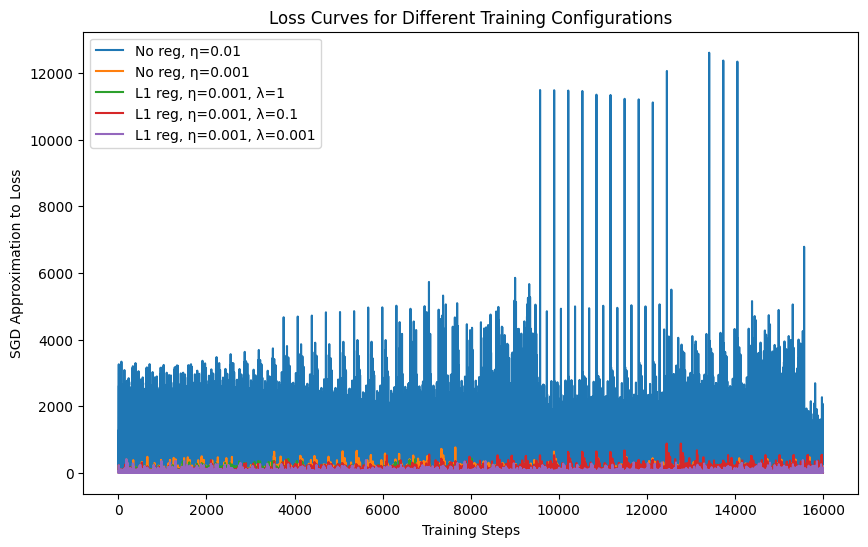

In [53]:
# Initialize parameters
weights = np.zeros(num_features)
bias = 0
num_epochs = 50
n_samples, num_features = X.shape
configs = [
    {"eta": 0.01, "lambda_reg": 0, "label": "No reg, η=0.01"},
    {"eta": 0.001, "lambda_reg": 0, "label": "No reg, η=0.001"},
    {"eta": 0.001, "lambda_reg": 1, "label": "L1 reg, η=0.001, λ=1"},
    {"eta": 0.001, "lambda_reg": 0.1, "label": "L1 reg, η=0.001, λ=0.1"},
    {"eta": 0.001, "lambda_reg": 0.001, "label": "L1 reg, η=0.001, λ=0.001"},
]

# Training and plotting loss
plt.figure(figsize=(10, 6))
for config in configs:
    eta = config["eta"]
    lambda_reg = config["lambda_reg"]
    weights = np.zeros(num_features)
    bias = 0
    loss_history = []

    for epoch in range(num_epochs):
        for i in range(n_samples):
            # Prediction and error calculation
            y_pred = np.dot(X[i], weights) + bias
            error = y_pred - y[i]

            # L1 Regularization
            weight_gradient = np.clip(2 * error * X[i] + lambda_reg * np.sign(weights), -gradient_clip_value, gradient_clip_value)
            bias_gradient = np.clip(2 * error, -gradient_clip_value, gradient_clip_value)
            weights -= eta * weight_gradient
            bias -= eta * bias_gradient
            loss = error**2 + lambda_reg * np.sum(np.abs(weights))
            loss_history.append(loss)

    plt.plot(loss_history, label=config["label"])

# Print the plot
plt.xlabel("Training Steps")
plt.ylabel("SGD Approximation to Loss")
plt.title("Loss Curves for Different Training Configurations")
plt.legend()
plt.show()

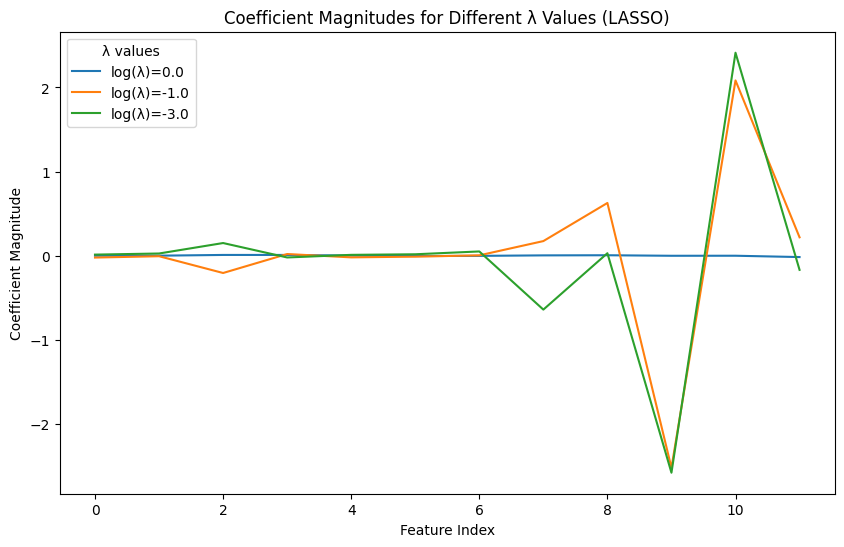

In [54]:
# Initialize values and learning rate for LASSO configurations
weights = np.zeros(num_features)
bias = 0
lambdas = [1, 0.1, 0.001]
eta = 0.001
weights_history = []

for lambda_reg in lambdas:
    weights = np.zeros(num_features)
    bias = 0
    for epoch in range(num_epochs):
        for i in range(n_samples):
            y_pred = np.dot(X[i], weights) + bias
            error = y_pred - y[i]

            # L1 Regularization gradient
            weight_gradient = np.clip(2 * error * X[i] + lambda_reg * np.sign(weights), -gradient_clip_value, gradient_clip_value)
            bias_gradient = np.clip(2 * error, -gradient_clip_value, gradient_clip_value)
            weights -= eta * weight_gradient
            bias -= eta * bias_gradient

    weights_history.append(weights)

# Plotting coefficient magnitudes for different Lambda values
plt.figure(figsize=(10, 6))
for i, weights in enumerate(weights_history):
    plt.plot(range(num_features), weights, label=f"log(λ)={np.log10(lambdas[i])}")

plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Coefficient Magnitudes for Different λ Values (LASSO)")
plt.legend(title="λ values")
plt.show()

In [55]:
# Tast features and target
X_test = test_data[feature_columns].values
y_test = test_data[target_column].values

weights = np.zeros(num_features)
bias = 0

# Define a function to calculate the test loss
def compute_test_loss(X, y, weights, bias):
    predictions = np.dot(X, weights) + bias
    mse_loss = np.mean((predictions - y) ** 2)
    return mse_loss

# List to store results
results = []

for config in configs:
    eta = config["eta"]
    lambda_reg = config["lambda_reg"]
    weights = np.zeros(num_features)
    bias = 0

    # Training loop (50 epochs)
    for epoch in range(num_epochs):
        for i in range(n_samples):
            # Prediction and error calculation
            y_pred = np.dot(X[i], weights) + bias
            error = y_pred - y[i]

            # L1 Regularization
            weight_gradient = np.clip(2 * error * X[i] + lambda_reg * np.sign(weights), -gradient_clip_value, gradient_clip_value)
            bias_gradient = np.clip(2 * error, -gradient_clip_value, gradient_clip_value)

            # Update weights and bias
            weights -= eta * weight_gradient
            bias -= eta * bias_gradient

    # Compute and store the test loss for this configuration
    test_loss = compute_test_loss(X_test, y_test, weights, bias)
    results.append({"Configuration": config["label"], "Test Loss": round(test_loss, 6)})

results_df = pd.DataFrame(results)
print(results_df)

              Configuration   Test Loss
0            No reg, η=0.01  326.975559
1           No reg, η=0.001    3.007125
2      L1 reg, η=0.001, λ=1    1.037162
3    L1 reg, η=0.001, λ=0.1    2.064368
4  L1 reg, η=0.001, λ=0.001    2.941788


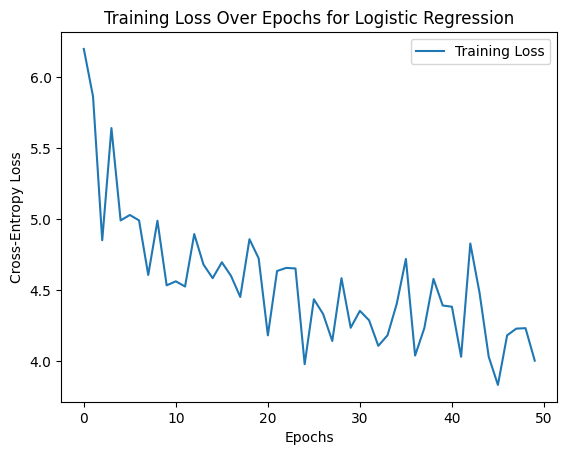

Final test loss: 5.70783


In [63]:
# Prepare the binary target variable
train_data['BinarySales'] = (train_data['Sales'] > 8).astype(int)
test_data['BinarySales'] = (test_data['Sales'] > 8).astype(int)

weights = np.zeros(num_features)
bias = 0

# Define features and binary target
X_train = train_data[feature_columns].values
y_train = train_data['BinarySales'].values
X_test = test_data[feature_columns].values
y_test = test_data['BinarySales'].values

# Sigmoid function with clipping to prevent overflow
def sigmoid(z):
    z = np.clip(z, -100, 100)
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss calculation
def compute_loss(y_true, y_pred):
    epsilon = 1e-7
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Training logistic regression using SGD
def train_logistic_regression(X, y, eta=0.01, epochs=50):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0
    loss_history = []

    for epoch in range(epochs):
        epoch_loss = 0

        for i in range(num_samples):
            z = np.dot(X[i], weights) + bias
            y_pred = sigmoid(z)

            # Compute gradient
            error = y_pred - y[i]
            weight_gradient = error * X[i]
            bias_gradient = error

            # Update weights and bias
            weights -= eta * weight_gradient
            bias -= eta * bias_gradient

            # Compute loss for this step
            epoch_loss += compute_loss(y[i], y_pred)

        # Average loss for the epoch
        avg_epoch_loss = epoch_loss / num_samples
        loss_history.append(avg_epoch_loss)

    return weights, bias, loss_history


# Train the model and plot the training loss
weights, bias, loss_history = train_logistic_regression(X_train, y_train, eta=0.01, epochs=50)

plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss Over Epochs for Logistic Regression")
plt.legend()
plt.show()

# Evaluate the model on the test set
def evaluate_model(X, y, weights, bias):
    predictions = sigmoid(np.dot(X, weights) + bias)
    test_loss = compute_loss(y, predictions)
    return test_loss

# Report final test loss
test_loss = evaluate_model(X_test, y_test, weights, bias)
print("Final test loss:", round(test_loss, 5))

### Poisson Distribution and Likelihood

Given \( X \sim \text{Poisson}(\lambda) \), the PMF is:

$$
P(X = x \mid \lambda) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

For \( n \) samples \( D = \{ x_1, x_2, \dots, x_n \} \), the likelihood function is:

$$
L(\lambda \mid D) = \prod_{i=1}^n \frac{\lambda^{x_i} e^{-\lambda}}{x_i!} = \frac{\lambda^{\sum x_i} e^{-n\lambda}}{\prod x_i!}
$$

### MLE of \( \lambda \)

To maximize the log-likelihood:

$$
\ln L(\lambda \mid D) = \sum x_i \ln \lambda - n \lambda - \sum \ln(x_i!)
$$

Setting the derivative to zero gives:

$$
\hat{\lambda}_{\text{MLE}} = \frac{1}{n} \sum x_i
$$

### Posterior Distribution (Conjugacy)

Assume a Gamma prior \( \lambda \sim \text{Gamma}(\alpha, \beta) \):

$$
p(\lambda \mid \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda}
$$

The posterior is proportional to likelihood \(\times\) prior:

$$
p(\lambda \mid D) \propto \lambda^{\sum x_i + \alpha - 1} e^{-(n + \beta)\lambda}
$$

Thus, \( \lambda \mid D \sim \text{Gamma}(\alpha + \sum x_i, \beta + n) \), confirming Gamma as a conjugate prior.

### MAP Estimate of \( \lambda \)

The MAP estimate is the mode of the posterior:

$$
\lambda_{\text{MAP}} = \frac{\alpha + \sum x_i - 1}{\beta + n} \quad \text{for } \alpha > 1
$$